In [51]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='white', palette='muted', color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px 

In [52]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder, MinMaxScaler 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor 
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error, confusion_matrix 
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.model_selection import train_test_split

In [53]:
data = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-4-heart.csv')
# data = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-3-insurance.csv')
# data.head(1)
# data.info()

In [54]:
data.duplicated().sum()
data.drop_duplicates(keep='first', subset=None, inplace=True, ignore_index=False)
data.duplicated().sum()

0

In [55]:
data.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.432080
thalach     0.419955
slope       0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trestbps   -0.146269
age        -0.221476
sex        -0.283609
thal       -0.343101
ca         -0.408992
oldpeak    -0.429146
exang      -0.435601
Name: target, dtype: float64

<AxesSubplot:title={'center':'Data Correlation'}>

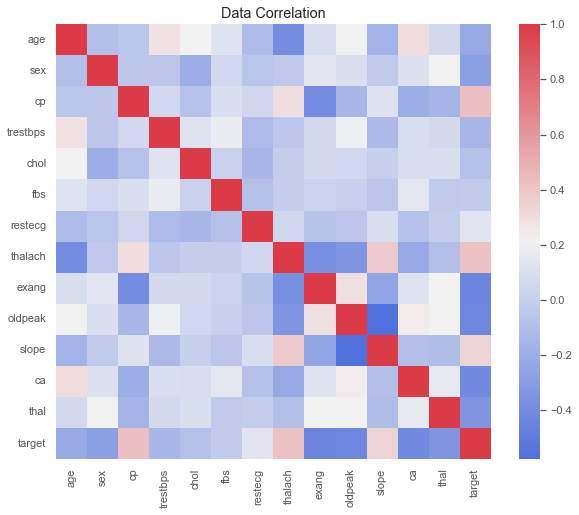

In [56]:
f, ax = plt.subplots(figsize=(10,8))
ax.set_title('Data Correlation')
data_corr = data.corr()

sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool_), cmap=sns.diverging_palette(2420,10, as_cmap=True), square=True, ax=ax)

Text(0.5, 1.0, 'Target Distribution')

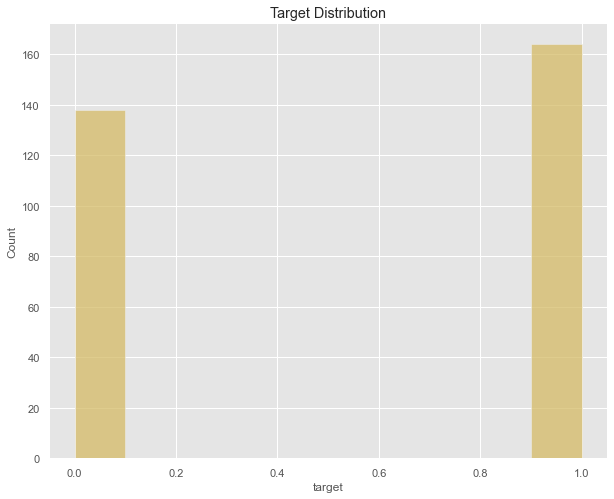

In [57]:
f,ax =plt.subplots(figsize=(10,8))

sns.histplot(data.target, color='y', ax=ax)
ax.set_title('Target Distribution')

c:\Users\amunv\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Age Boxplot'}, xlabel='age'>

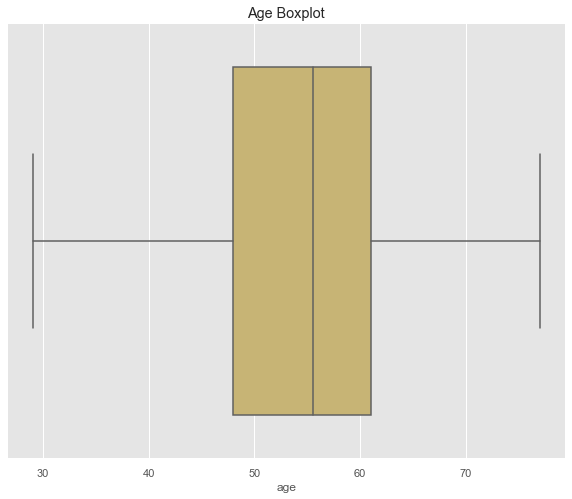

In [58]:
f,ax =plt.subplots(figsize=(10,8))
ax.set_title('Age Boxplot')
sns.boxplot(data.age, color='y', ax=ax)

In [59]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [60]:
num_val =['age','trestbps','chol','thalach','oldpeak' ]
cat_val =['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']
x= data.drop(columns=['target'], axis=1)
y = data.target


In [61]:
tobe_encdat = [('num', StandardScaler(), num_val),('cat', OrdinalEncoder(), cat_val)]
tobe_transdat = ColumnTransformer(transformers=tobe_encdat)

x = tobe_transdat.fit_transform(x)
x


array([[ 0.94979429,  0.76406571, -0.26128493, ...,  0.        ,
         0.        ,  1.        ],
       [-1.92854796, -0.09140084,  0.06774054, ...,  0.        ,
         0.        ,  2.        ],
       [-1.48572607, -0.09140084, -0.82256367, ...,  2.        ,
         0.        ,  2.        ],
       ...,
       [ 1.50332164,  0.70703461, -1.0354625 , ...,  1.        ,
         2.        ,  3.        ],
       [ 0.28556146, -0.09140084, -2.23543773, ...,  1.        ,
         1.        ,  3.        ],
       [ 0.28556146, -0.09140084, -0.20322161, ...,  1.        ,
         1.        ,  2.        ]])

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [63]:
logireg = LogisticRegression() 
logireg.fit(x_train,y_train)

LogisticRegression()

In [64]:
y_pred_train = logireg.predict(x_train)
y_pred_test = logireg.predict(x_test)

In [65]:
scr_acc_train = accuracy_score(y_train, y_pred_train)
scr_acc_test = accuracy_score(y_test, y_pred_test)

In [66]:
model_accu_per = pd.DataFrame([
    'LogisticRegression', scr_acc_train, scr_acc_test
]).transpose()
model_accu_per.columns = ['Method', 'Accuracy Score Train', 'Accuracy Score Test']
model_accu_per

,Method,Accuracy Score Train,Accuracy Score Test
0,LogisticRegression,0.876777,0.813187


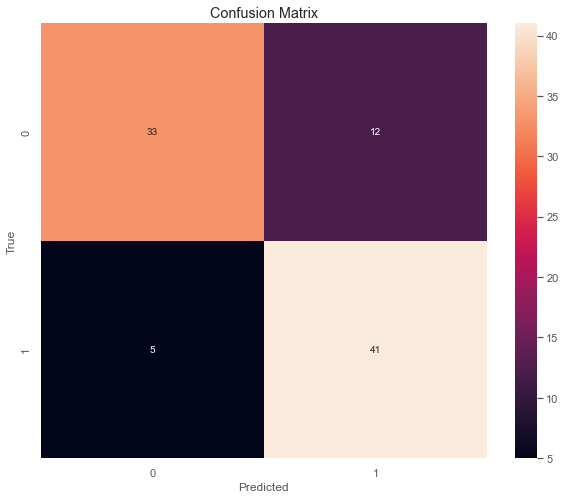

In [67]:
cm_dic = { 
    'y_true': y_test,
    'y_pred': y_pred_test
}

cm_cols = pd.DataFrame(cm_dic, columns=['y_true', 'y_pred'])
confusion_matrix = pd.crosstab(cm_cols['y_true'], cm_cols['y_pred'], rownames=['True'], colnames=['Predicted'])

f,ax = plt.subplots(figsize=(10,8))
ax.set_title('Confusion Matrix')
sns.heatmap(confusion_matrix, annot=True)
plt.show()